In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy
% matplotlib inline

### DEPARTMENT TABLE   (There are 21 Departments )


In [92]:
dep=pd.read_csv('departments.csv')     
dep


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [3]:
depnum=dep.department_id.max()         # number of departments
depnum

21

In [4]:
dep.isnull().sum()                    #no missing values

department_id    0
department       0
dtype: int64

### AISLES TABLE  (There are 134 AISLES)

In [93]:
aisles=pd.read_csv('aisles.csv')
aisles

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation
5,6,other
6,7,packaged meat
7,8,bakery desserts
8,9,pasta sauce
9,10,kitchen supplies


In [6]:
aislenum=aisles.aisle_id.max()           # number of aisle
aislenum

134

In [7]:
aisles.isnull().sum()        # no missing values

aisle_id    0
aisle       0
dtype: int64

## ORDERS TABLE 
### There are 3,421,083 orders, 206,209 user_ids, 100 order_number
### There are 3 eval_set (prior, train, test)
Prior Set= 3,214,874 data,  Train Set = 131, 209 data, Test Set =75,000 data

In [8]:
orders=pd.read_csv('orders.csv')
orders.head()    #order_dow days of the week

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [9]:
orders.order_id.count()  

3421083

In [10]:
useruniq=orders.user_id.unique()
useruniq.size

206209

In [11]:
ornumunique=orders.order_number.unique()
ornumunique.size

100

In [12]:
orders.eval_set.value_counts()

prior    3214874
train     131209
test       75000
Name: eval_set, dtype: int64

In [13]:
orders.isnull().sum()      #missing values in days_since_prior_order = users first order in INSTACART

order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64

## Volume of orders is lowest at 3am and highest at 10am
#### Volume of orders starts picking up at 5am and at high from 10am - 4pm. Then starts declining at 5pm to 3am

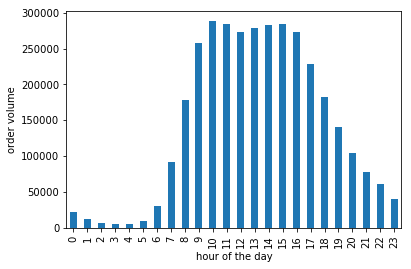

In [14]:
hourdist=orders['order_hour_of_day'].value_counts().sort_index()
hourdist.plot(kind='bar')
_=plt.xlabel('hour of the day')
_=plt.ylabel('order volume')
_=plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])

In [15]:
hourdist.idxmax()

10

In [16]:
hourdist.idxmin()

3

## Distribution or orders vs days_since_prior_order
Reorder volume is at max every 30 days (monthly)
Rerder volum is at min every 26 days

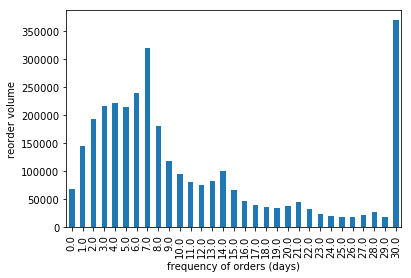

In [17]:
reorder_freq=orders.days_since_prior_order.value_counts().sort_index()
reorder_freq.plot(kind='bar')
_=plt.xlabel('frequency of orders (days)')
_=plt.ylabel('reorder volume')

### Reorder volume >75,000 at frequency of 1-14 days

In [18]:
reorder_freq[reorder_freq> 75000]


1.0     145247
2.0     193206
3.0     217005
4.0     221696
5.0     214503
6.0     240013
7.0     320608
8.0     181717
9.0     118188
10.0     95186
11.0     80970
12.0     76146
13.0     83214
14.0    100230
30.0    369323
Name: days_since_prior_order, dtype: int64

In [19]:
reorder_freq.idxmax()

30.0

In [20]:
reorder_freq.idxmin()

26.0

In [21]:
orday=orders.order_dow.value_counts()

## Order Volume is highest on Mondays and lowest on Fridays

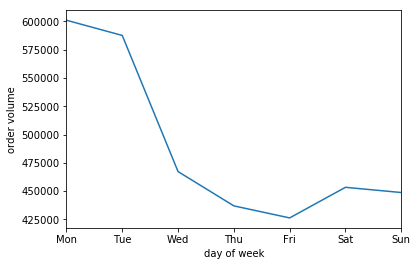

In [22]:
orday.sort_index().plot()
_=plt.xlabel('day of week')
_=plt.ylabel('order volume')
_=plt.xticks([0,1,2,3,4,5,6], ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

In [23]:
orday.idxmax()


0

In [24]:
orday.idxmin()

4

### SEPERATED ORDERS TABLE

In [25]:
orders.eval_set.value_counts()

prior    3214874
train     131209
test       75000
Name: eval_set, dtype: int64

In [26]:
oprior=orders[orders.eval_set=='prior']
otrain=orders[orders.eval_set=='train']
otest=orders[orders.eval_set=='test']

In [27]:
oprior.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [28]:
otrain.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
10,1187899,1,train,11,4,8,14.0
25,1492625,2,train,15,1,11,30.0
49,2196797,5,train,5,0,11,6.0
74,525192,7,train,21,2,11,6.0
78,880375,8,train,4,1,14,10.0


In [29]:
otest.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
38,2774568,3,test,13,5,15,11.0
44,329954,4,test,6,3,12,30.0
53,1528013,6,test,4,3,16,22.0
96,1376945,11,test,8,6,11,8.0
102,1356845,12,test,6,1,20,30.0


### PRODUCTS TABLE (There are 49688 Products)


In [30]:
prod=pd.read_csv('products.csv')
prod.head()
prodnum=prod.product_id.max()     #number of products available
prod.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [31]:
prodnum

49688

In [32]:
prod.isnull().sum()          # no missing value

product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64

In [33]:
top5prodep=prod.department_id.value_counts().head()    # top 5 departments with most products 
top5prodep

11    6563
19    6264
13    5371
7     4365
1     4007
Name: department_id, dtype: int64

## ORDER PRODUCTS PRIOR TABLE

In [34]:
prior=pd.read_csv('order_products__prior.csv')
prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [35]:
prior.shape

(32434489, 4)

In [36]:
prior.order_id.unique().size

3214874

In [37]:
prior.isnull().sum()         # no missing values

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

In [38]:
prior.order_id.value_counts().head()

1564244    145
790903     137
61355      127
2970392    121
2069920    116
Name: order_id, dtype: int64

## ORDER PRODUCTS TRAIN TABLE

In [39]:
train=pd.read_csv('order_products__train.csv')
train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [40]:
train.isnull().sum()     # no missing values

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

In [41]:
samp=pd.read_csv('sample_submission.csv')
samp.head()

,order_id,products
0,17,39276 29259
1,34,39276 29259
2,137,39276 29259
3,182,39276 29259
4,257,39276 29259


In [42]:
samp.isnull().sum()     # no missing values

order_id    0
products    0
dtype: int64

## MERGING TABLES


### USING TRAIN DATA

In [43]:
alltrain=otrain.merge(train)
alltrain=alltrain.merge(prod)
alltrain=alltrain.merge(dep)
alltrain=alltrain.merge(aisles)


In [44]:
alltrain.head(10)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,department,aisle
0,1187899,1,train,11,4,8,14.0,196,1,1,Soda,77,7,beverages,soft drinks
1,2757217,67,train,25,0,11,5.0,196,1,1,Soda,77,7,beverages,soft drinks
2,632715,676,train,12,0,13,26.0,196,2,1,Soda,77,7,beverages,soft drinks
3,1167274,760,train,5,4,10,8.0,196,2,1,Soda,77,7,beverages,soft drinks
4,3347074,804,train,16,3,21,5.0,196,4,0,Soda,77,7,beverages,soft drinks
5,692135,865,train,4,5,11,30.0,196,1,0,Soda,77,7,beverages,soft drinks
6,3289231,992,train,22,5,14,30.0,196,6,1,Soda,77,7,beverages,soft drinks
7,1269882,1306,train,7,5,10,6.0,196,9,1,Soda,77,7,beverages,soft drinks
8,1558696,1512,train,4,1,10,27.0,196,1,0,Soda,77,7,beverages,soft drinks
9,2005577,1550,train,14,1,14,30.0,196,6,1,Soda,77,7,beverages,soft drinks


Ntrain=alltrain.groupby(['user_id', 'order_number', 'order_id', 'order_dow', 'add_to_cart_order', 'product_id', 'product_name'])['product_id'].size()  
Ntrain=pd.DataFrame(Ntrain)
Ntrain

In [45]:
#Average number of products per order 
alltrain.groupby('order_id')['product_name'].size().mean()`

10.552759338155157

### USING PRIOR DATA

In [46]:
allprior=oprior.merge(prior)
allprior=allprior.merge(prod)
allprior=allprior.merge(dep)
allprior=allprior.merge(aisles)
allprior

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,department,aisle
0,2539329,1,prior,1,2,8,NaN,196,1,0,Soda,77,7,beverages,soft drinks
1,2398795,1,prior,2,3,7,15.0,196,1,1,Soda,77,7,beverages,soft drinks
2,473747,1,prior,3,3,12,21.0,196,1,1,Soda,77,7,beverages,soft drinks
3,2254736,1,prior,4,4,7,29.0,196,1,1,Soda,77,7,beverages,soft drinks
4,431534,1,prior,5,4,15,28.0,196,1,1,Soda,77,7,beverages,soft drinks
5,3367565,1,prior,6,2,7,19.0,196,1,1,Soda,77,7,beverages,soft drinks
6,550135,1,prior,7,1,9,20.0,196,1,1,Soda,77,7,beverages,soft drinks
7,3108588,1,prior,8,1,14,14.0,196,2,1,Soda,77,7,beverages,soft drinks
8,2295261,1,prior,9,1,16,0.0,196,4,1,Soda,77,7,beverages,soft drinks
9,2550362,1,prior,10,4,8,30.0,196,1,1,Soda,77,7,beverages,soft drinks


In [47]:
allprior.shape

(32434489, 15)

In [48]:
#what is the most sold product on day 0 of the week
allprior[allprior.order_dow==0].product_name.value_counts().head(1)

Banana    96769
Name: product_name, dtype: int64

## ALLPRIOR TABLE 

In [77]:
Nprior=allprior.groupby(['user_id', 'order_number', 'order_id', 'order_dow', 'add_to_cart_order', 'product_id', 'product_name'])['product_id'].size() 
Nprior

user_id  order_number  order_id  order_dow  add_to_cart_order  product_id  product_name                                                                            
1        1             2539329   2          1                  196         Soda                                                                                        1
                                            2                  14084       Organic Unsweetened Vanilla Almond Milk                                                     1
                                            3                  12427       Original Beef Jerky                                                                         1
                                            4                  26088       Aged White Cheddar Popcorn                                                                  1
                                            5                  26405       XL Pick-A-Size Paper Towel Rolls                                                     

In [75]:
allprior.shape


(32434489, 15)

In [76]:
alltrain.shape

(1384617, 15)

## ALLTRAIN TABLE

## What is the probability of a specific product being ordered?

In [74]:
## Probability of Products being ordered using alltrain table 
ProbA=alltrain.product_name.value_counts()
ProbA=pd.DataFrame(ProbA)
ProbA['P(ordered)']=ProbA['product_name']/alltrain.product_name.size


,product_name,P(ordered)
Banana,18726,1.352432e-02
Bag of Organic Bananas,15480,1.117999e-02
Organic Strawberries,10894,7.867880e-03
Organic Baby Spinach,9784,7.066214e-03
Large Lemon,8135,5.875271e-03
Organic Avocado,7409,5.350938e-03
Organic Hass Avocado,7293,5.267161e-03
Strawberries,6494,4.690106e-03
Limes,6033,4.357162e-03
Organic Raspberries,5546,4.005440e-03


## What is the probability of each department being ordered from?


In [117]:
ProbD=alltrain.department.value_counts()
ProbD=pd.DataFrame(ProbD)
ProbD['P(ordered)']=ProbD['department']/alltrain.department.size
ProbD.head(10)

,department,P(ordered)
produce,409087,0.295451
dairy eggs,217051,0.156759
snacks,118862,0.085845
beverages,114046,0.082366
frozen,100426,0.072530
pantry,81242,0.058675
bakery,48394,0.034951
canned goods,46799,0.033799
deli,44291,0.031988
dry goods pasta,38713,0.027959


## Can you classify the customer as MEAT EATER, PESCATARIAN, VEGETARIAN, VEGAN?

### MEAT EATERS 
(will order from aisle_id = 5, 7, 15, 34, 35, 39, 49, 95, 96, 106, 122

In [145]:
Train=alltrain.sort_values(by='user_id')
Meat1=Train[Train.aisle_id==5].sort_values(by='user_id')
Meat2=Train[Train.aisle_id==7].sort_values(by='user_id')
Meat3=Train[Train.aisle_id==15].sort_values(by='user_id')
Meat4=Train[Train.aisle_id==34].sort_values(by='user_id')
Meat5=Train[Train.aisle_id==35].sort_values(by='user_id')
Meat6=Train[Train.aisle_id==39].sort_values(by='user_id')
Meat7=Train[Train.aisle_id==49].sort_values(by='user_id')
Meat8=Train[Train.aisle_id==95].sort_values(by='user_id')
Meat9=Train[Train.aisle_id==96].sort_values(by='user_id')
Meat10=Train[Train.aisle_id==106].sort_values(by='user_id')
Meat11=Train[Train.aisle_id==122].sort_values(by='user_id')

#Meat Eaters DataFrame
MeatE=pd.concat([Meat1,Meat2,Meat3, Meat4,Meat5, Meat6, Meat7, Meat8, Meat9, Meat10, Meat11])

# Number of meat eaters out of 131209  customers
MeatEnumcust=MeatE.user_id.unique().size
MeatEnumcust


38858

In [149]:
traincust=alltrain.user_id.unique().size
traincust

131209

## Percentage of meat eaters customers

In [151]:
MeatEpercent=MeatEnumcust/traincust*100
MeatEpercent

29.615346508242574

## NonMeat Eaters

In [157]:
Nonmeat=alltrain.merge(MeatE, how='left')
Nonmeat.shape

(1384617, 15)

(1384617, 1)